<a href="https://colab.research.google.com/github/Talibsid-1996/Global-Terrorism-Analysis-Project/blob/main/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Global Terrorism Data.csv', encoding='ISO-8859-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [53]:
df.head(2)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN


In [4]:
df = df[['iyear','imonth','iday','country_txt','region_txt','city','attacktype1_txt','targtype1_txt','target1','gname','nkill','nwound','weaptype1_txt']]

In [ ]:
list(df['`'].unique())

In [5]:
df = df.rename(columns = {'iyear':'year','imonth':'month','iday':'day','country_txt':'country','region_txt': 'region','attacktype1_txt':'attack_type','targtype1_txt':'target_type','target1':'Target','gname':'Group','nkill':'killed','nwound':'wound','weaptype1_txt':'weapon_type'})

In [6]:
df.isnull().sum()

year               0
month              0
day                0
country            0
region             0
city             434
attack_type        0
target_type        0
Target           636
Group              0
killed         10313
wound          16311
weapon_type        0
dtype: int64

In [7]:
df['casualities'] = df['killed'] + df['wound']

In [8]:
print(f"""
    There are {df.country.nunique()} countries from {df.region.nunique()} regions covered in the dataset and terrorist atacks data in {df.year.nunique()}
    years from {df.year.min()} to {df.year.max()}. Overally {df.index.nunique()} terrorist attacks are recorded here which caused about {int(df.casualities.sum())} casualities
    consisted of {int(df.killed.sum())} kills and {int(df.wound.sum())} wounded.
""")


    There are 205 countries from 12 regions covered in the dataset and terrorist atacks data in 47
    years from 1970 to 2017. Overally 181691 terrorist attacks are recorded here which caused about 872892 casualities
    consisted of 411868 kills and 523869 wounded.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(*args, **kw)>

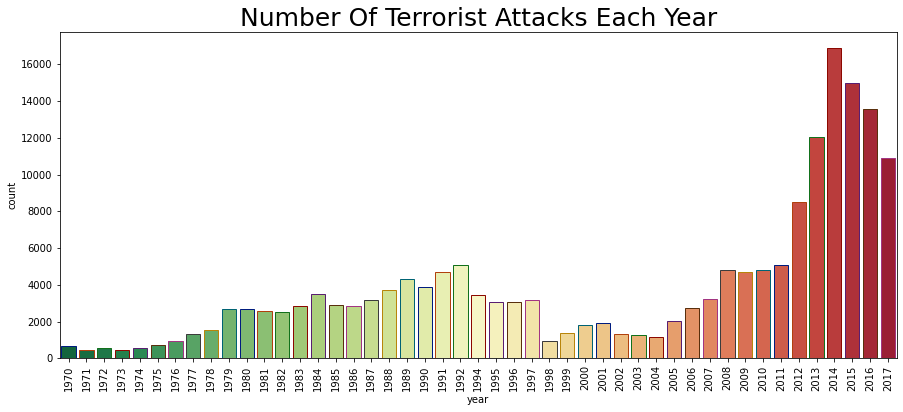

In [17]:
plt.subplots(figsize = (15,6))
sns.countplot('year',data = df,palette = 'RdYlGn_r',ec = sns.color_palette('dark',10))
plt.xticks(rotation = 'vertical')
plt.title('Number Of Terrorist Attacks Each Year',fontsize = 25)
plt.show

# **No of Casualties**

In [23]:
yearly_casualities = df[['year','casualities']].groupby('year')['casualities'].sum().reset_index()

<function matplotlib.pyplot.show(*args, **kw)>

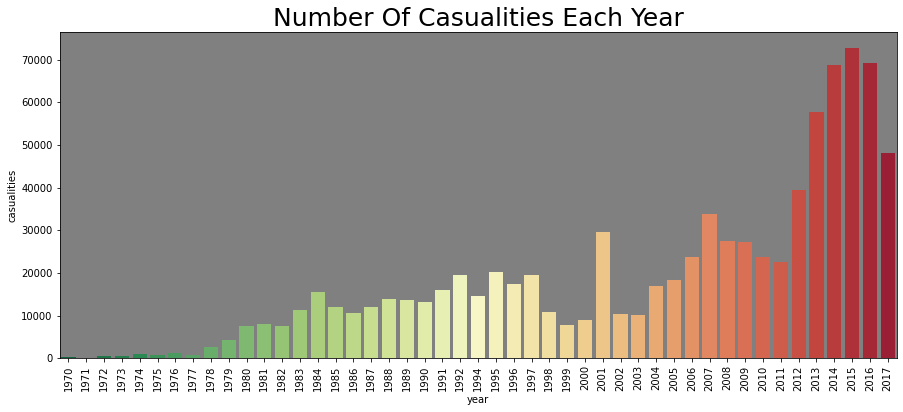

In [37]:
plt.subplots(figsize = (15,6))
plt.rcParams['axes.facecolor'] = 'grey'
sns.barplot(x = yearly_casualities['year'],y = yearly_casualities['casualities'],palette='RdYlGn_r')
plt.xticks(rotation = 'vertical')
plt.title('Number Of Casualities Each Year',fontsize = 25)
plt.show

# ***Number of Total attacks Each Country.

In [39]:
df.head(2)

,year,month,day,country,region,city,attack_type,target_type,Target,Group,killed,wound,weapon_type,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,Private Citizens & Property,Julio Guzman,MANO-D,1.0,0.0,Unknown,1.0
1,1970,0,0,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",23rd of September Communist League,0.0,0.0,Unknown,0.0


In [51]:
country_attacks = df['country'].value_counts().reset_index().rename(columns = {'index':'Country','country':'No. of Attacks'}).head(15)

<function matplotlib.pyplot.show(*args, **kw)>

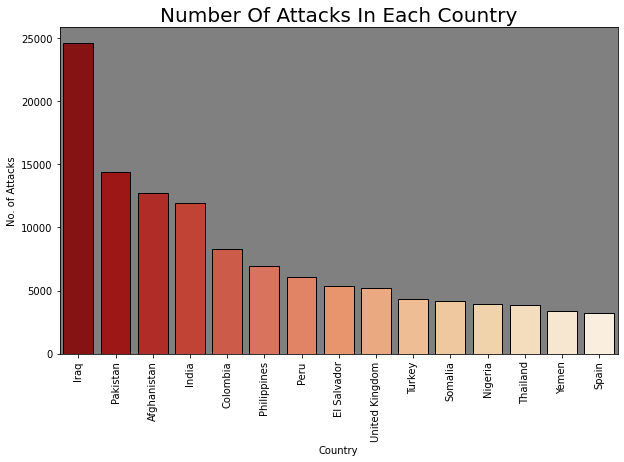

In [57]:
plt.subplots(figsize = (10,6))

sns.barplot(x =country_attacks['Country'] , y = country_attacks['No. of Attacks'] ,palette = 'OrRd_r',ec = 'black' )

plt.xticks(rotation = 'vertical')
plt.title('Number Of Attacks In Each Country',fontsize = 20)
plt.show

# **Number of Total Casualities in Each Country**

Text(0.5, 1.0, 'Number of Total Casualities in Each Country')

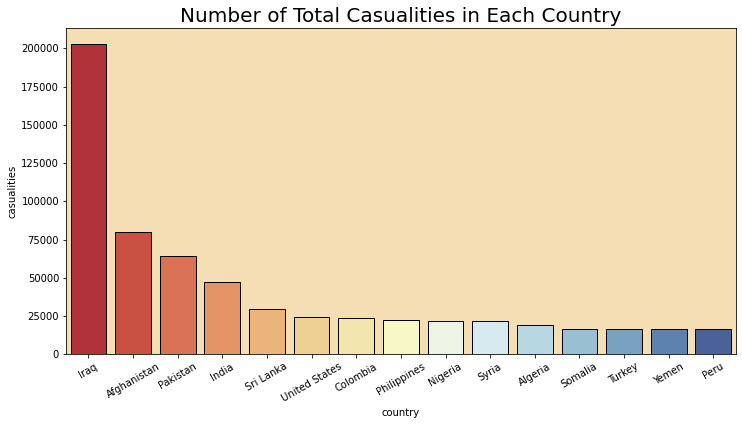

In [73]:
country_casualty = df[['country','casualities']].groupby('country')['casualities'].sum().reset_index().sort_values('casualities',ascending = False).head(15)

plt.rcParams['axes.facecolor'] = 'wheat'
plt.subplots(figsize = (12,6))
sns.barplot(x = country_casualty['country'], y = country_casualty['casualities'],palette = 'RdYlBu',ec = 'black')
plt.xticks(rotation = 30) 
plt.title('Number of Total Casualities in Each Country' ,fontsize = 20)

#***Total casualities happened in Iraq(202982) followed Afghanistan(80213) ,Paksitan(64427) and (47108)***

***Number of Total Attacks in Each Region***

Text(0.5, 1.0, 'Number of Total Attacks in Each Region')

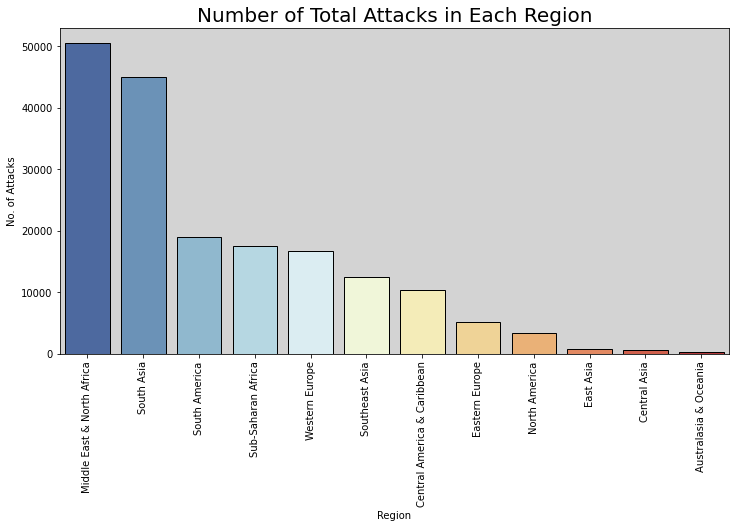

In [85]:
region_attacks = df['region'].value_counts().reset_index().rename(columns = {'index':'Region','region':'No. of Attacks'}).head(15)

plt.rcParams['axes.facecolor'] = 'lightgrey'
plt.subplots(figsize = (12,6))
sns.barplot(x = region_attacks['Region'], y = region_attacks['No. of Attacks'],palette = 'RdYlBu_r',ec = 'black')
plt.xticks(rotation = 90) 
plt.title('Number of Total Attacks in Each Region' ,fontsize = 20)


In [89]:
df.head(2)

,year,month,day,country,region,city,attack_type,target_type,Target,Group,killed,wound,weapon_type,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,Private Citizens & Property,Julio Guzman,MANO-D,1.0,0.0,Unknown,1.0
1,1970,0,0,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",23rd of September Communist League,0.0,0.0,Unknown,0.0


# ***Attack type used by most of the time.***

<function matplotlib.pyplot.show(*args, **kw)>

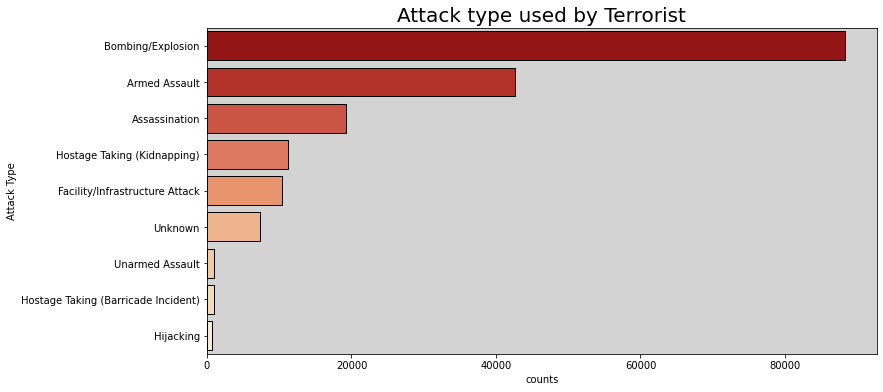

In [100]:
attack_used = df['attack_type'].value_counts().reset_index().rename(columns = {'index':'Attack Type','attack_type':'counts'})

plt.subplots(figsize = (12,6))

sns.barplot(x =attack_used['counts'] , y = attack_used['Attack Type'] ,palette = 'OrRd_r',ec = 'black' )

# plt.xticks(rotation = 'vertical')
plt.title('Attack type used by Terrorist',fontsize = 20)
plt.show

# **This information is useful for Army or a Government.**Most of the time 
terrorist used Bombing/Explosion(88255 times) for Attacking.





# **No of Attacks by different Groups Active.**



In [118]:
# getting non null values

df_new = df[~df['Group'].replace('Unknown',np.nan).isna()]


3536

<function matplotlib.pyplot.show(*args, **kw)>

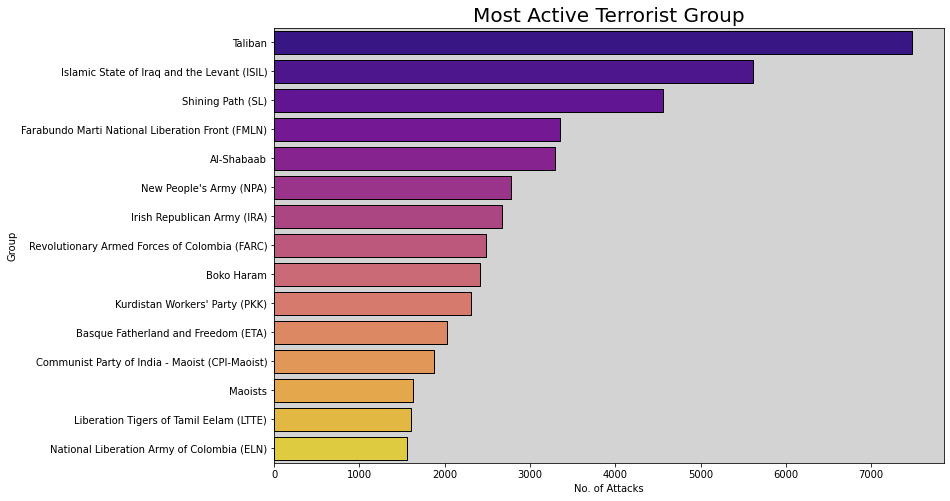

In [132]:
Active_gp = df_new['Group'].value_counts().reset_index().rename(columns = {'index': 'Group','Group':'No. of Attacks'}).head(15)

plt.subplots(figsize = (12,8))

sns.barplot(x =Active_gp['No. of Attacks'] , y = Active_gp['Group'] ,palette = 'plasma',ec = 'black' )

# plt.xticks(rotation = 'vertical')
plt.title('Most Active Terrorist Group',fontsize = 20)
plt.show

# **Most Active Terrorist organisations are Taliban(7478 attacks) ,ISIL(5613 attacks) and Shining Path(4555 attacks).**

# **No. of Groups active in different countries**

<function matplotlib.pyplot.show(*args, **kw)>

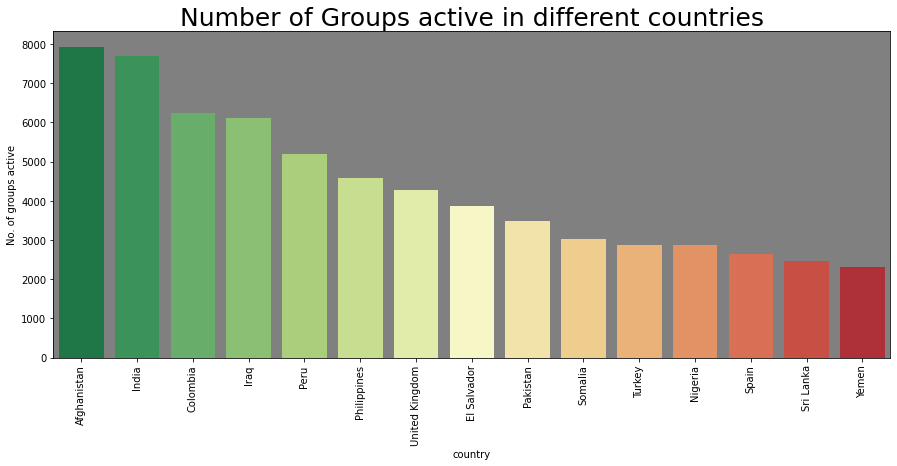

In [141]:
No_of_gps = df_new[['country','Group']].groupby('country')['Group'].count().reset_index().sort_values('Group',ascending = False).head(15)

plt.subplots(figsize = (15,6))
plt.rcParams['axes.facecolor'] = 'grey'
sns.barplot(x = No_of_gps['country'],y = No_of_gps['Group'],palette='RdYlGn_r')
plt.xticks(rotation = 'vertical')
plt.ylabel('No. of groups active')
plt.title('Number of Groups active in different countries',fontsize = 25)
plt.show

# **Most Number of Groups active in Afghanistan(7925 groups) followed India(7697 groups) and colombia(6236 groups).It is useful information for Militries and Government of countries.** 